# Linear Regression

In [2]:
import sys
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
house_price_data = pd.read_csv('Final-Data_MidTermProject_Real-State-Regression.csv')

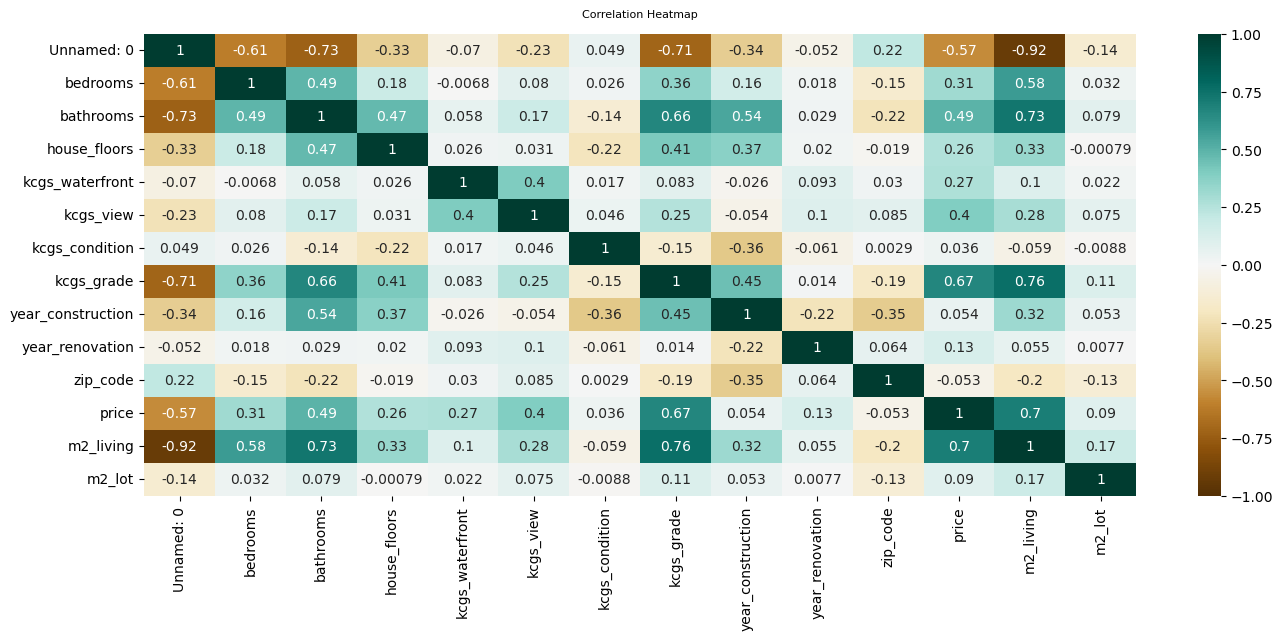

In [4]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(house_price_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12)

plt.show()

In [5]:
x = house_price_data ["m2_living"]
y = house_price_data ["price"]

In [6]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

In [7]:
def linear_function(x):
 return slope * x + intercept

In [8]:
my_first_model = list(map(linear_function, x))

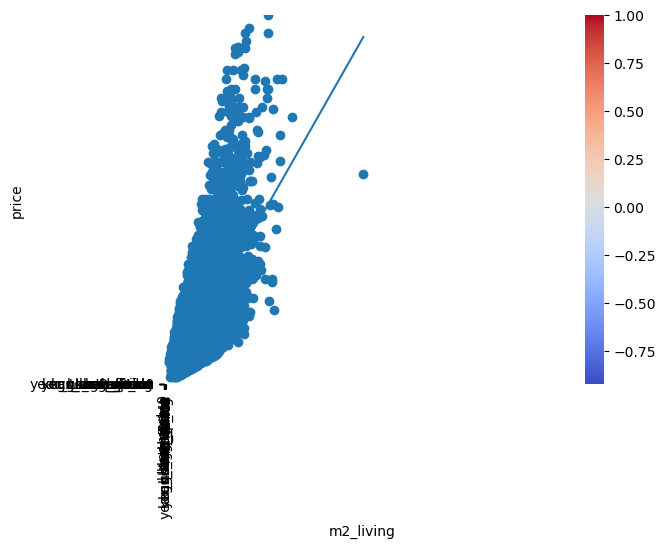

In [36]:
plt.scatter(x, y)
plt.plot(x, slope * x + intercept)
plt.ylim(ymin=0, ymax=4000000)
plt.xlim(xmin=0, xmax=2500)
plt.xlabel("m2_living")
plt.ylabel ("price")
plt.show() 

## Linear Regression Table

- Model based on Ordinary Least Squares with smf.ols(). 
- The explanatory variable must be written first in the parenthesis. 
- By calling .fit(), you obtain the variable results. 
- This holds a lot of information about the regression model.
- Call summary() to get the table with the results of linear regression.

In [11]:
import statsmodels.formula.api as smf # statistical library in Python

house_price_data = pd.read_csv('Final-Data_MidTermProject_Real-State-Regression.csv')

model = smf.ols('price ~ m2_living', data = house_price_data)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 08 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:14:48   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -4.4e+04   4410.200     -9.977      0.0

- Coef (coefficient) is the output of the linear regression function.
- The linear regression function can be rewritten mathematically as:

### y = slope * x + interscept // price = 3022.1675 * m2_living + -4.4e+04

- If m2_living increases by 1, price increases by 3022.1675 (or 3022 rounded)
- If m2_living = 0, the price is equal to -4.4e+04.
- The intercept is used to adjust the model's precision of predicting.

What is the Price, if m2_living would be 3000, 4000, 5000?

In [12]:
def predict_house_price(m2_living):
 return(3022.1675 * m2_living + -4.4e+04)

print(predict_house_price(3000))
print(predict_house_price(4000))
print(predict_house_price(5000))

9022502.5
12044670.0
15066837.5


## Test: Does the coefficient from the linear regression function has a significant impact on the dependent variable (price)?

Prove that there is a relationship between m2_living and price --- using statistical tests.

There are four components that explains the statistics of the coefficients:

    std err stands for Standard Error
    t is the "t-value" of the coefficients
    P>|t| is called the "P-value"
     [0.025  0.975] represents the confidence interval of the coefficients

In [40]:
x = house_price_data['m2_living']
y = house_price_data['price']

slope, intercept, r, p, std_err = stats.linregress(x,y)

def linear_regression_function(x):
    return slope * x + intercept

my_first_model = list(map(linear_regression_function, x))

print(my_first_model)

[3757884.426018998, 3340825.3099778704, 2775679.986067068, 2733369.640961446, 2663859.7882879246, 2539950.920478604, 2391864.712608929, 2207512.49464872, 2204490.327141175, 2201468.159633631, 2168224.3170506423, 2162179.982035554, 2125913.9719450213, 2122891.804437476, 2095692.2968695771, 2056404.1192714998, 2044315.449241322, 2041293.2817337776, 2035248.9467186888, 2032226.7792111444, 2020138.1091809669, 2011071.6066583337, 1998982.936628156, 1983872.0990904341, 1956672.5915225344, 1950628.2565074456, 1944583.9214923568, 1935517.4189697236, 1923428.748939546, 1917384.4139244573, 1902273.576386735, 1893207.073864102, 1887162.738849013, 1878096.23632638, 1869029.7338037468, 1829741.5562056694, 1820675.0536830362, 1820675.0536830362, 1817652.8861754918, 1799519.8811302255, 1796497.713622681, 1790453.3786075923, 1784409.0435925035, 1781386.8760849591, 1778364.7085774147, 1763253.8710396928, 1757209.5360246038, 1754187.3685170594, 1751165.201009515, 1748143.0335019706, 1745120.8659944262, 

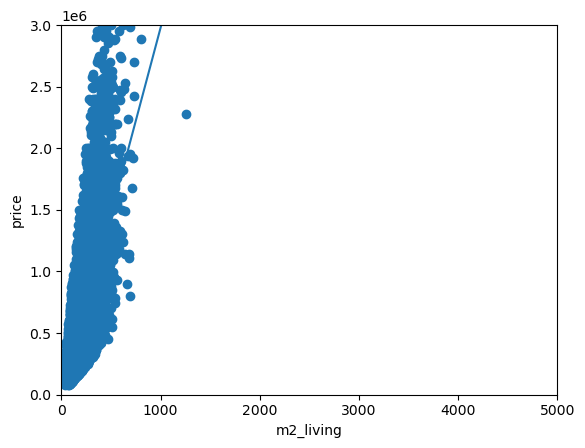

In [41]:
plt.scatter(x,y)
plt.plot(x, my_first_model)
plt.ylim(ymin=0, ymax=3000000)
plt.xlim(xmin=0, xmax=5000)
plt.xlabel('m2_living')
plt.ylabel('price')

plt.show()

Alternative Try

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
x = house_price_data['m2_living'].values.reshape(-1,1)
y = house_price_data['price'].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_predict = lr.predict(x)

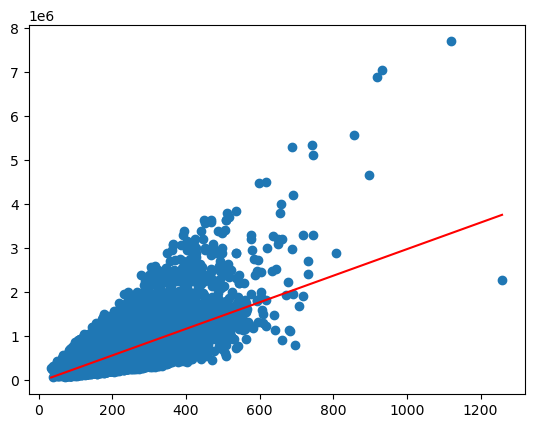

In [44]:
plt.scatter(x,y)
plt.plot(x,y_predict,color='red')
plt.show()

(R)MSE measures the difference between the known value and the predicted value.

In [45]:
plt.figure
sns.heatmap(house_price_data.corr(), cmap='coolwarm')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [46]:
size = house_price_data['m2_living']
price = house_price_data['price']

x = np.array(size).reshape(-1,1)
y = np.array(price)

Fitting the linear regressuíon model

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [49]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

Calculate Intercept and Coefficient

In [50]:
print(lm.intercept_)
print(lm.coeff_)

prediction = model.predict(X_test)
predictions = prediction.reshape(-1,1)

[-40138.62741294]


AttributeError: 'LinearRegression' object has no attribute 'coeff_'

## Plot for normality

In [34]:
# Plot the distribution of each variable and check out if it resembles a normal distribution.
# If not, fit and apply a transformer/scaler:

import numpy as np
from sklearn.preprocessing import PowerTransformer

power= PowerTransformer()
power.fit(X_train)
power.transform(X_train)
power.transform(X_test)

array([[ 2.44467572],
       [-0.58645036],
       [ 1.29809698],
       ...,
       [ 0.05106288],
       [-0.18129629],
       [-0.65529641]])

In [35]:
# Training Set
trans.fit(x_train)
trans.transform(x_train)
model.fit(x_train,y_train)

# Test Set
trans.transform(x_test)
model.predict(x_test)

NameError: name 'trans' is not defined

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
lm = LinearRegression() # fit_intercept = True

model = lm.fit(X_train,y_train)
predictions  = model.predict(X_test)
model.coef_
model.intercept_

NameError: name 'X' is not defined